# Practical 5
### Aim : Write a program to solve Tic-Tac-Toe using min-max algorithm

In [ ]:
class Board:
    def __init__(self,parent,mat,turn):
        self.depth = 0
        self.parent = parent
        self.children = []
        self.Leaf = False
        self.score = 0
        self.mat = mat
        self.turn = turn
        self.PossiblePlaces = self.CreateSet(self.mat)
        self.movesLeft = len(self.PossiblePlaces)
        w = self.CheckWin()
        if w == 1 or w == -1:
            self.score = w
            self.Leaf = True
    def CreateSet(self,mat):
        possiblePlace = set()
        for x in range(3):
            for y in range(3):
                if mat[x][y] == '':
                    possiblePlace.add((x,y))
        return possiblePlace
    def printMat(self):
        for x in range(3):
            for y in range(3):
                if self.mat[x][y] == '':
                    print("_",end="  ")
                else:
                    print(self.mat[x][y],end="  ")
            print()
    def printPossiblePlaces(self):
        print(self.PossiblePlaces)
    def ChangeTurn(self):
        if self.turn == 'X':
            self.turn = 'O'
        else:
            self.turn = 'X'
    def CheckWin(self):
        ## row
        if self.mat[0][0] == self.mat[0][1] and self.mat[0][1] == self.mat[0][2] and self.mat[0][0] != '':
            if self.mat[0][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[1][0] == self.mat[1][1] and self.mat[1][1] == self.mat[1][2] and self.mat[1][0] != '':
            if self.mat[1][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[2][0] == self.mat[2][1] and self.mat[2][1] == self.mat[2][2] and self.mat[2][0] != '':
            if self.mat[2][0] == 'X':
                return 1
            else:
                return -1
        ## column
        if self.mat[0][0] == self.mat[1][0] and self.mat[1][0] == self.mat[2][0] and self.mat[0][0] != '':
            if self.mat[0][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[0][1] == self.mat[1][1] and self.mat[1][1] == self.mat[2][1] and self.mat[0][1] != '':
            if self.mat[0][1] == 'X':
                return 1
            else:
                return -1
        if self.mat[0][2] == self.mat[1][2] and self.mat[1][2] == self.mat[2][2] and self.mat[0][2] != '':
            if self.mat[0][2] == 'X':
                return 1
            else:
                return -1
        ## diagonals
        if self.mat[0][0] == self.mat[1][1] and self.mat[1][1] == self.mat[2][2] and self.mat[0][0] != '':
            if self.mat[0][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[0][2] == self.mat[1][1] and self.mat[1][1] == self.mat[2][0] and self.mat[0][2] != '':
            if self.mat[0][2] == 'X':
                return 1
            else:
                return -1
        else:
            return 0
    def PlayPossible(self):
        lst = []
        for x in self.PossiblePlaces:
            m = [[x for x in y] for y in self.mat]
            t = ''
            if self.turn == 'X':
                m[x[0]][x[1]] = 'O'
                t = 'O'
            else:
                m[x[0]][x[1]] = 'X'
                t = 'X'
            n = Board(self,m,t)
            n.depth = self.depth + 1
            lst.append(n)
        self.children= lst
        return lst

class Queue:
    def __init__(self):
        self.arr = []
        self.len = 0
    def append(self,n):
        self.arr.append(n)
        self.len += 1
    def pop(self)-> Board:
        n = self.arr.pop(0)
        self.len -= 1
        return n
    def hasElements(self):
        if self.len >= 1:
            return True
        else:
            return False
    def inQueue(self,node):
        for x in self.arr:
            if x.isEqual(node):
                return True
        return False

In [ ]:
def BuildTree(i):
    nxtMoves = i.PlayPossible()
    score = []
    s = 0
    for x in nxtMoves:
        if x.Leaf == False:
            score.append(BuildTree(x))
        else:
            score.append(x.score)
    if len(score) == 0:
        return 0
    if i.turn == 'O':
        s = max(score)
    else:
        s = min(score)
    i.score = s
    return s
def BFS(i):
    queue = Queue()
    queue.append(i)
    while queue.hasElements():
        state = queue.pop()
        state.printMat()
        print("Depth = ",state.depth," Score = ",state.score," Leaf = ",state.Leaf)
        print("-----------------------")
        for x in state.children:
            queue.append(x)

## Running for single level

In [ ]:
i = Board(None,[['X','O','X'],['','X',''],['','','O']],'O')
i.printMat()
nxtMoves = i.PlayPossible()
for x in nxtMoves:
    print("------------")
    x.printMat()
print("\nScore = ",i.score)


X  O  X  
_  X  _  
_  _  O  
------------
X  O  X  
X  X  _  
_  _  O  
------------
X  O  X  
_  X  X  
_  _  O  
------------
X  O  X  
_  X  _  
X  _  O  
------------
X  O  X  
_  X  _  
_  X  O  

Score =  0


In [ ]:
i = Board(None,[['X','O','X'],['','O',''],['','O','X']],'X')
i.printMat()
nxtMoves = i.PlayPossible()
for x in nxtMoves:
    print("------------")
    x.printMat()
print("\nScore = ",i.score)

X  O  X  
_  O  _  
_  O  X  
------------
X  O  X  
O  O  _  
_  O  X  
------------
X  O  X  
_  O  O  
_  O  X  
------------
X  O  X  
_  O  _  
O  O  X  

Score =  -1


In [ ]:
i = Board(None,[['X','O','X'],['','X','O'],['X','','O']],'O')
i.printMat()
nxtMoves = i.PlayPossible()
for x in nxtMoves:
    print("------------")
    x.printMat()
print("\nScore = ",i.score)

X  O  X  
_  X  O  
X  _  O  
------------
X  O  X  
X  X  O  
X  _  O  
------------
X  O  X  
_  X  O  
X  X  O  

Score =  1


## Constructing tree and finding score

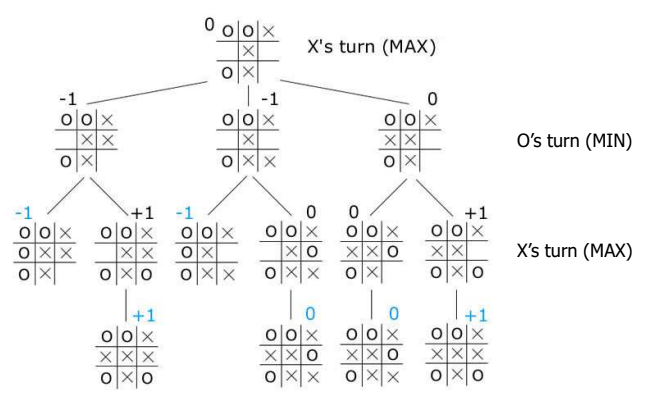

In [ ]:
i = Board(None,[['O','O','X'],['','X',''],['O','X','']],'O')
print("------- input -------")
i.printMat()
print("------- Tree -------")
print("----------------------------")
score = BuildTree(i)
BFS(i)
print("\nScore = ",score)


------- input -------
O  O  X  
_  X  _  
O  X  _  
------- Tree -------
----------------------------
O  O  X  
_  X  _  
O  X  _  
Depth =  0  Score =  0  Leaf =  False
-----------------------
O  O  X  
X  X  _  
O  X  _  
Depth =  1  Score =  0  Leaf =  False
-----------------------
O  O  X  
_  X  X  
O  X  _  
Depth =  1  Score =  -1  Leaf =  False
-----------------------
O  O  X  
_  X  _  
O  X  X  
Depth =  1  Score =  -1  Leaf =  False
-----------------------
O  O  X  
X  X  O  
O  X  _  
Depth =  2  Score =  0  Leaf =  False
-----------------------
O  O  X  
X  X  _  
O  X  O  
Depth =  2  Score =  1  Leaf =  False
-----------------------
O  O  X  
O  X  X  
O  X  _  
Depth =  2  Score =  -1  Leaf =  True
-----------------------
O  O  X  
_  X  X  
O  X  O  
Depth =  2  Score =  1  Leaf =  False
-----------------------
O  O  X  
O  X  _  
O  X  X  
Depth =  2  Score =  -1  Leaf =  True
-----------------------
O  O  X  
_  X  O  
O  X  X  
Depth =  2  Score =  0  Leaf =  False


In [ ]:
i = Board(None,[['X','','X'],['O','X',''],['','','']],'O')
print("------- input -------")
i.printMat()
print("------- Tree -------")
print("----------------------------")
score = BuildTree(i)
BFS(i)
print("\nScore = ",score)

------- input -------
X  _  X  
O  X  _  
_  _  _  
------- Tree -------
----------------------------
X  _  X  
O  X  _  
_  _  _  
Depth =  0  Score =  1  Leaf =  False
-----------------------
X  X  X  
O  X  _  
_  _  _  
Depth =  1  Score =  1  Leaf =  True
-----------------------
X  _  X  
O  X  X  
_  _  _  
Depth =  1  Score =  1  Leaf =  False
-----------------------
X  _  X  
O  X  _  
_  X  _  
Depth =  1  Score =  1  Leaf =  False
-----------------------
X  _  X  
O  X  _  
X  _  _  
Depth =  1  Score =  1  Leaf =  True
-----------------------
X  _  X  
O  X  _  
_  _  X  
Depth =  1  Score =  1  Leaf =  True
-----------------------
X  O  X  
O  X  X  
_  _  _  
Depth =  2  Score =  1  Leaf =  False
-----------------------
X  _  X  
O  X  X  
O  _  _  
Depth =  2  Score =  1  Leaf =  False
-----------------------
X  _  X  
O  X  X  
_  O  _  
Depth =  2  Score =  1  Leaf =  False
-----------------------
X  _  X  
O  X  X  
_  _  O  
Depth =  2  Score =  1  Leaf =  False
-----

In [ ]:
i = Board(None,[['O','O','X'],['','X',''],['O','X','']],'X')
i.printMat()
print("----------------------------")
score = BuildTree(i)
BFS(i)
print("\nScore = ",score)

O  O  X  
_  X  _  
O  X  _  
----------------------------
O  O  X  
_  X  _  
O  X  _  
Depth =  0  Score =  -1  Leaf =  False
-----------------------
O  O  X  
O  X  _  
O  X  _  
Depth =  1  Score =  -1  Leaf =  True
-----------------------
O  O  X  
_  X  O  
O  X  _  
Depth =  1  Score =  -1  Leaf =  False
-----------------------
O  O  X  
_  X  _  
O  X  O  
Depth =  1  Score =  -1  Leaf =  False
-----------------------
O  O  X  
X  X  O  
O  X  _  
Depth =  2  Score =  0  Leaf =  False
-----------------------
O  O  X  
_  X  O  
O  X  X  
Depth =  2  Score =  -1  Leaf =  False
-----------------------
O  O  X  
X  X  _  
O  X  O  
Depth =  2  Score =  0  Leaf =  False
-----------------------
O  O  X  
_  X  X  
O  X  O  
Depth =  2  Score =  -1  Leaf =  False
-----------------------
O  O  X  
X  X  O  
O  X  O  
Depth =  3  Score =  0  Leaf =  False
-----------------------
O  O  X  
O  X  O  
O  X  X  
Depth =  3  Score =  -1  Leaf =  True
-----------------------
O  O  X  
X  X  